In [88]:
%matplotlib inline

# Enable Retina mode for higher-res on Macbook's with Retina Display
%config InlineBackend.figure_format = 'retina'

import pyspark.sql.functions as func
import matplotlib.pyplot as plt

from IPython.display import display, HTML
import seaborn as sns

In [89]:
sqlContext

In [90]:
itemsDF = sqlContext.read.format("json") \
            .load("file:/root/pipeline/myapps/html/advancedspark.com/json/software.json") \
            .select("id", "title", "category", "description")

In [91]:
import pyspark.sql.functions as func

categoriesDF = itemsDF.select("category") \
                 .groupBy("category") \
                 .count() \
                 .orderBy("count", ascending=False) \
                 .filter("count > 10") \
                 .toPandas()

display(categoriesDF)

,category,count
0,Library,15
1,Database,12
2,Data Processing,11


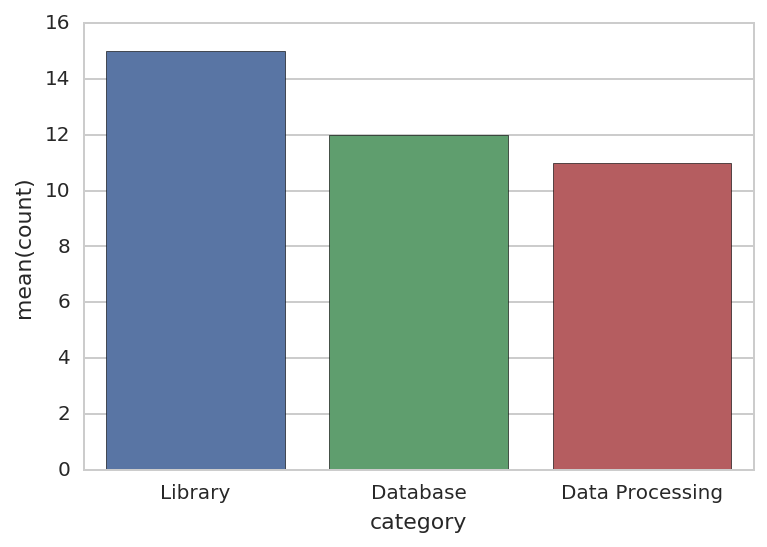

In [92]:
sns.set_style("whitegrid")
plot = sns.barplot(x="category", y="count", data=categoriesDF)

In [131]:
from pyspark.ml.feature import RegexTokenizer

tokenizer = RegexTokenizer(inputCol = "description", \
                           outputCol="words", \
                           gaps=False, \
                           pattern="\\p{L}+")
tokenizer

RegexTokenizer_4af08e84c8a0f68da778

In [134]:
from pyspark.ml.feature import StopWordsRemover

stopWordsFilter = StopWordsRemover(inputCol = "words", \
                                   outputCol = "filteredWords", \
                                   caseSensitive = False)
stopWordsFilter

StopWordsRemover_412ca2f2c20bd012c900

In [143]:
from pyspark.ml.feature import HashingTF

tf = HashingTF(inputCol = "filteredWords", \
               outputCol = "tfFeatures")
                                   
tf

HashingTF_486fb49baebcca2ce849

In [151]:
from pyspark.ml.feature import IDF

idf = IDF(inputCol = "tfFeatures", \
          outputCol = "idfFeatures")
                                   
idf

IDF_422ca8d74d1c6f48e54e

In [152]:
from pyspark.ml.feature import StringIndexer

categoryIndexer = StringIndexer(inputCol = "category", \
                                outputCol = "indexedCategory") 

categoryIndexerModel = categoryIndexer.fit(itemsDF)

categoryIndexerModel

StringIndexer_43b293bdcccf445086ac

In [153]:
from pyspark.ml.classification import DecisionTreeClassifier

classifier = DecisionTreeClassifier(featuresCol = "idfFeatures", \
                                    labelCol = "indexedCategory", \
                                    predictionCol = "prediction", \
                                    rawPredictionCol = "confidence", \
                                    probabilityCol = "probability")
classifier

DecisionTreeClassifier_4bd483260c1a8c6b77bb

In [155]:
from pyspark.ml.feature import IndexToString

categoryReverseIndexer = IndexToString(inputCol = "prediction", \
                                       outputCol = "predictedCategory", \
                                       labels = categoryIndexerModel.labels)

categoryReverseIndexer

IndexToString_4cb0ae3c2bc25dda4f40

In [162]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = [tokenizer, stopWordsFilter, tf, idf, categoryIndexerModel, classifier, categoryReverseIndexer])

pipeline

Pipeline_4107abad5dd61727528e

In [163]:
# TODO:  Implement Cross Validation and Grid Search

In [164]:
pipeline.fit(itemsDF)

IllegalArgumentException: u'Field "outputCol" does not exist.'